### Q1. Consider an image with 2 objects and a total of 3-pixel values (1 for each object and one for the background). Add Gaussian noise to the image. Implement and test Otsu’s algorithm with this image.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from collections import deque

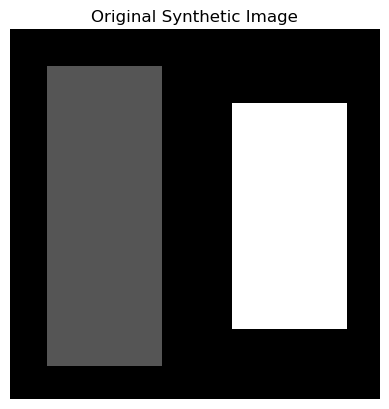

In [ ]:

image = np.zeros((100, 100), dtype=np.uint8)


cv2.rectangle(image, (10, 10), (40, 90), 50, -1)
cv2.rectangle(image, (60, 20), (90, 80), 150, -1)

# Display original image
plt.imshow(image, cmap='gray')
plt.title("Original Synthetic Image")
plt.axis('off')
plt.show()


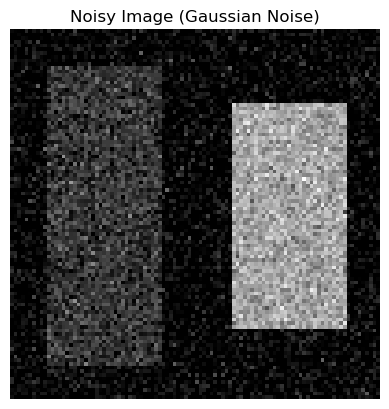

In [11]:
# Add Gaussian noise
noisy_image = random_noise(image, mode='gaussian', var=0.01)
noisy_image = (255 * noisy_image).astype(np.uint8)

# Display noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image (Gaussian Noise)")
plt.axis('off')
plt.show()


## Step 3: Apply Otsu’s Thresholding

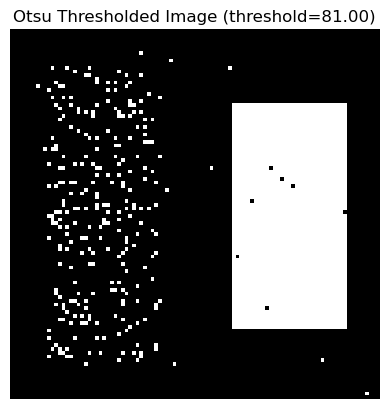

In [12]:
# Otsu's thresholding
_, otsu_thresh = cv2.threshold(noisy_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display thresholded image
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Thresholded Image (threshold={_:0.2f})")
plt.axis('off')
plt.show()


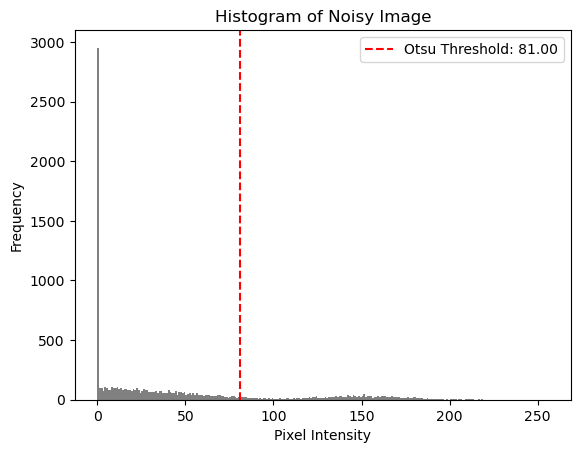

In [23]:
# Plot histogram of noisy image
plt.hist(noisy_image.ravel(), bins=256, range=(0, 256), color='gray')
plt.axvline(_, color='red', linestyle='--', label=f'Otsu Threshold: {_:.2f}')
plt.title("Histogram of Noisy Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()
plt.show()


### Q2. Implement a region-growing technique for image segmentation. The basic idea is to start from a set of points inside the object of interest (foreground), denoted as seeds, and recursively add neighboring pixels as long as they are in a pre-defined range of the pixel values of the seeds.

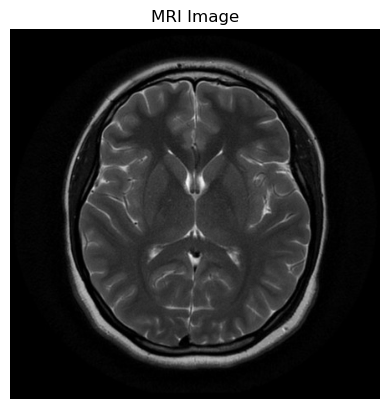

In [16]:
# Load MRI image
image = cv2.imread("MRI.jpeg", cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError("Image not found. Please check the file path.")

plt.imshow(image, cmap='gray')
plt.title("MRI Image")
plt.axis('off')  # Hide axes
plt.show()


In [17]:
def region_growing(image, seeds, threshold=5):
    height, width = image.shape
    segmented = np.zeros_like(image, dtype=np.uint8)
    visited = np.zeros_like(image, dtype=bool)

    queue = list(seeds)
    seed_values = [image[y, x] for x, y in seeds]
    mean_value = np.mean(seed_values)

    while queue:
        x, y = queue.pop(0)
        if visited[y, x]:
            continue
        visited[y, x] = True

        current_value = image[y, x]
        if abs(int(current_value) - int(mean_value)) <= threshold:
            segmented[y, x] = 255

            # 8-connected neighbors
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    if dx == 0 and dy == 0:
                        continue
                    nx, ny = x + dx, y + dy
                    if (0 <= nx < width) and (0 <= ny < height) and not visited[ny, nx]:
                        queue.append((nx, ny))

    return segmented

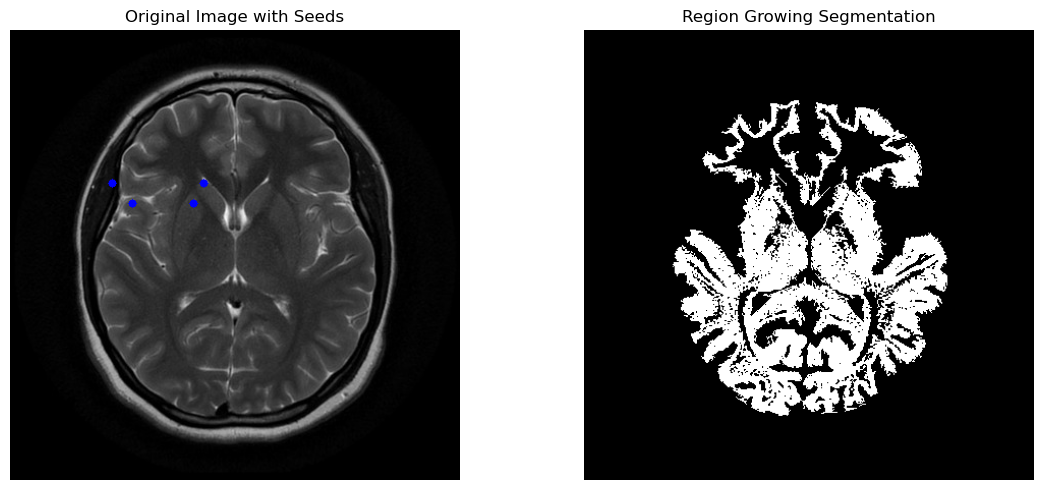

In [18]:
# Define seed points (x, y)
seed_points = [(100, 150), (120, 170), (180, 170), (190, 150)]  # Manually tuned

# Apply region growing
segmented_mask = region_growing(image, seed_points, threshold=10)

# Visualize seed points on the original image
image_marked = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for x, y in seed_points:
    cv2.circle(image_marked, (x, y), radius=4, color=(255, 0, 0), thickness=-1)  # Blue dots

# Show images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image with Seeds")
plt.imshow(cv2.cvtColor(image_marked, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Region Growing Segmentation")
plt.imshow(segmented_mask, cmap='gray')
plt.axis('off')

plt.tight_layout()